In [2]:
words = open("names.txt", 'r').read().splitlines()

In [3]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1,ch2)
        b[bigram] = b.get(bigram, 0) + 1


In [4]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [1]:
import torch

In [5]:
N = torch.zeros((27,27), dtype = torch.int32)

In [9]:
chars=sorted(list(set(''.join(words))))
stoi={s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [10]:
for w in words:
    ch = ['.'] + list(w) + ['.']
    for ch1,ch2 in zip(ch, ch[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1,ix2] += 1

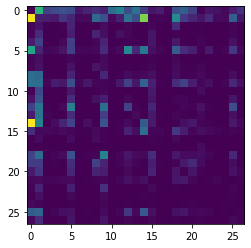

In [68]:
import matplotlib.pyplot as plt

plt.imshow(N)

In [11]:
g = torch.Generator().manual_seed(100)
p = torch.rand(3, generator = g)
p = p / p.sum()
p

tensor([0.0938, 0.6855, 0.2206])

In [12]:
ix = torch.multinomial(p, num_samples = 1, replacement = True, generator = g).item()
itos[ix]

'b'

In [23]:
P = (N+1).float()
P /= P.sum(dim = 1, keepdim = True)

In [24]:
g = torch.Generator().manual_seed(2147483647)
ix = 0
for i in range(20):
    out = []
    while True:

        p = P[ix]
        ix = torch.multinomial(p, num_samples = 1, replacement = True, generator = g).item()
        out.append(itos[ix])
        if ix==0:
            break
    print("".join(out))

junide.
janasah.
p.
cony.
a.
nn.
kohin.
tolian.
juee.
ksahnaauranilevias.
dedainrwieta.
ssonielylarte.
faveumerifontume.
phynslenaruani.
core.
yaenon.
ka.
jabdinerimikimaynin.
anaasn.
ssorionsush.


In [22]:
nll = 0.0
n = 0
for w in words:
    
    ch = ['.'] + list(w) + ['.']
    for ch1,ch2 in zip(ch, ch[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1,ix2]
        log_prob = torch.log(prob)
        nll -= log_prob
        n +=1
#         print(f"{ch1}{ch2}: {prob:.4f}")
        
print(f"{nll/n}")

2.454094171524048


In [29]:
xs, ys = [], []
for w in words[:1]:
    
    ch = ['.'] + list(w) + ['.']
    for ch1,ch2 in zip(ch, ch[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
        
xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [30]:
xs

tensor([ 0,  5, 13, 13,  1])

In [34]:
import torch.nn.functional as F

xenc = F.one_hot(xs, num_classes = 27).float()

In [35]:
xenc.shape

torch.Size([5, 27])

In [84]:
W = torch.randn((27,27), requires_grad = True)
logits = xenc@W
counts = logits.exp()
probs = counts / counts.sum(1, keepdims = True)

In [85]:
loss = -probs[torch.arange(5), ys].log().mean()
print(loss.item())

3.7517197132110596


In [82]:
W.grad = None
loss.backward()

In [83]:
W.data -= 0.1 * W.grad

In [87]:
for i in range(100):
    
    xenc = F.one_hot(xs, num_classes = 27).float()

    logits = xenc@W
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdims = True)
    
    loss = -probs[torch.arange(5), ys].log().mean()
    print(loss.item())
    W.grad = None
    loss.backward()
    
    W.data -= 0.1 * W.grad
    


3.5501418113708496
3.530198335647583
3.510295867919922
3.4904351234436035
3.470616102218628
3.450840711593628
3.4311084747314453
3.4114203453063965
3.3917770385742188
3.3721790313720703
3.3526268005371094
3.333120822906494
3.31366229057312
3.2942516803741455
3.2748889923095703
3.255575656890869
3.236311435699463
3.217097520828247
3.197934627532959
3.178823471069336
3.159763813018799
3.1407573223114014
3.1218037605285645
3.102904796600342
3.0840601921081543
3.0652711391448975
3.0465378761291504
3.0278611183166504
3.0092415809631348
2.990679979324341
2.972177028656006
2.953733205795288
2.9353489875793457
2.917025327682495
2.8987629413604736
2.8805620670318604
2.8624234199523926
2.8443479537963867
2.82633638381958
2.8083887100219727
2.790505886077881
2.772688627243042
2.7549376487731934
2.737253427505493
2.7196364402770996
2.702087163925171
2.6846067905426025
2.6671955585479736
2.6498539447784424
2.6325831413269043
2.615382671356201
2.5982537269592285
2.5811972618103027
2.564213275909424
